<a href="https://colab.research.google.com/github/goitstudent123/python_data_science/blob/main/%D0%94%D0%976_%D0%93%D0%90%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
f(x)\;=\;2\!\left(\frac{4}{1.2\sqrt{2\pi}}\;e^{-\frac12\left(\frac{x-11}{1.2}\right)^2}\;+\;\frac{7}{2.4\sqrt{2\pi}}\;e^{-\frac12\left(\frac{x-15}{2.4}\right)^2}\right),
\qquad a=9,\; b=18.
$$


In [6]:

import sympy as sp

x = sp.Symbol('x', real=True)
f = 2*( 4/(1.2*sp.sqrt(2*sp.pi))*sp.exp(-sp.Rational(1,2)*((x-11)/1.2)**2)
       + 7/(2.4*sp.sqrt(2*sp.pi))*sp.exp(-sp.Rational(1,2)*((x-15)/2.4)**2) )

a, b = sp.Integer(9), sp.Integer(18)

F = sp.integrate(f, x)
I_sym_exact = sp.integrate(f, (x, a, b))

print("F(x) =", sp.simplify(F))
print("∫_a^b f(x) dx (exact) =", sp.simplify(I_sym_exact))
print("∫_a^b f(x) dx (float) =", sp.N(I_sym_exact, 10))


F(x) = sqrt(2)*(4.94974746830583*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*erf(0.58925565098879*x - 6.48181216087669))
∫_a^b f(x) dx (exact) = 14.178654163478*sqrt(2)
∫_a^b f(x) dx (float) = 20.05164501


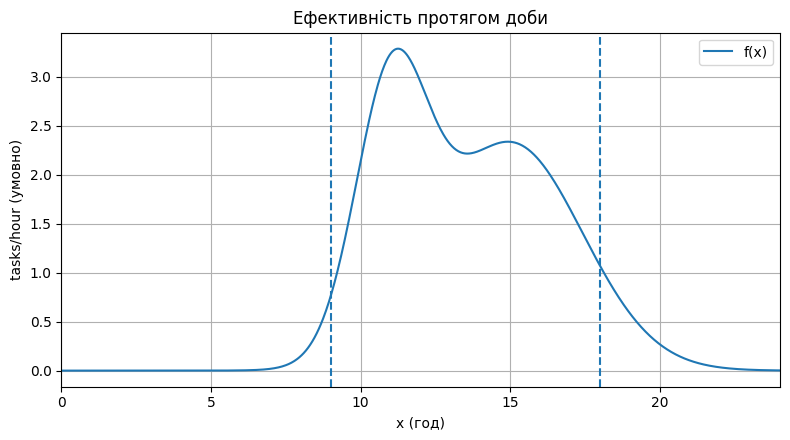

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.

f_np = sp.lambdify(x, f, 'numpy')

xs = np.linspace(0, 24, 1000)
ys = f_np(xs)

plt.figure(figsize=(8,4.5))
plt.plot(xs, ys, label='f(x)')
plt.axvline(9, linestyle='--')
plt.axvline(18, linestyle='--')
plt.xlim(0, 24)
plt.xlabel('x (год)')
plt.ylabel('tasks/hour (умовно)')
plt.title('Ефективність протягом доби')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
from scipy import integrate

n = 1000

# 2) Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від a до b.

def rect_rule(f, a, b, n, where="mid"):
    a, b = float(a), float(b)
    h = (b - a) / n
    if where == "left":
        xs = a + h*np.arange(0, n)
    elif where == "right":
        xs = a + h*np.arange(1, n+1)
    else:
        xs = a + h*(np.arange(0, n) + 0.5)
    return h * np.sum(f(xs))

I_rect_mid  = rect_rule(f_np, 9, 18, n, where="mid")
I_rect_left = rect_rule(f_np, 9, 18, n, where="left")
I_rect_right= rect_rule(f_np, 9, 18, n, where="right")
print("Rect (mid): ", I_rect_mid)
print("Rect (left):", I_rect_left)
print("Rect (right):", I_rect_right)

# 3) Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від a до b.

def trap_rule(f, a, b, n):
    a, b = float(a), float(b)
    h = (b - a) / n
    xs = a + h*np.arange(0, n+1)
    ys = f(xs)
    return h * (0.5*ys[0] + np.sum(ys[1:-1]) + 0.5*ys[-1])

I_trap      = trap_rule(f_np, 9, 18, n)
print("Trapezoid:  ", I_trap)

# 4) Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від a до b.

def simpson_rule(f, a, b, n):
    if n % 2 == 1:
        n += 1
    a, b = float(a), float(b)
    h = (b - a) / n
    xs = a + h*np.arange(0, n+1)
    ys = f(xs)
    return (h/3) * (ys[0] + ys[-1] + 4*np.sum(ys[1:-1:2]) + 2*np.sum(ys[2:-2:2]))

I_simp      = simpson_rule(f_np, 9, 18, n)
print("Simpson:    ", I_simp)


# 5) Порахуй інтеграл від a до b за допомогою функції scipy.integrate.quad.

I_quad, err = integrate.quad(lambda t: float(f_np(t)), 9, 18)
print("scipy.integrate.quad:       ", I_quad)
print("scipy.integrate.quad err:   ", err)


Rect (mid):  20.05165035518613
Rect (left): 20.050284225265795
Rect (right): 20.052984439122532
Trapezoid:   20.051634332194162
Simpson:     20.051645014196342
scipy.integrate.quad:        20.051645014188306
scipy.integrate.quad err:    1.267228690553365e-11
